Univariate Analysis of the Trip Data

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

Relative Path: When you provide just the filename ('train.csv'), Python looks for the file in the current working directory. This is called using a relative path.

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head(10)

,bicycle_id,start_time,end_time,start_location,end_location
0,86602,2015-01-01 00:04:00,2015-01-01 00:10:00,802,508
1,86157,2015-01-01 00:04:00,2015-01-01 00:16:00,802,508
2,86091,2015-01-01 00:08:00,2015-01-01 00:32:00,513,1106
3,86908,2015-01-01 00:09:00,2015-01-01 00:29:00,513,604
4,86758,2015-01-01 00:10:00,2015-01-01 00:11:00,508,508
5,86075,2015-01-01 00:15:00,2015-01-01 00:21:00,516,901
6,86814,2015-01-01 00:19:00,2015-01-01 00:30:00,902,902
7,86176,2015-01-01 00:19:00,2015-01-01 00:30:00,902,902
8,86548,2015-01-01 00:22:00,2015-01-01 00:31:00,611,705
9,86027,2015-01-01 00:22:00,2015-01-01 00:31:00,611,705


In [4]:
df.tail(10)

,bicycle_id,start_time,end_time,start_location,end_location
135474,86852,2015-05-31 23:42:00,2015-05-31 23:43:00,204,204
135475,86335,2015-05-31 23:44:00,2015-05-31 23:52:00,1101,905
135476,86450,2015-05-31 23:44:00,2015-05-31 23:52:00,1101,905
135477,86069,2015-05-31 23:44:00,2015-06-01 00:00:00,507,203
135478,86285,2015-05-31 23:45:00,2015-05-31 23:59:00,804,601
135479,86568,2015-05-31 23:45:00,2015-06-01 00:00:00,507,203
135480,86166,2015-05-31 23:46:00,2015-06-01 00:01:00,804,601
135481,86201,2015-05-31 23:46:00,2015-06-01 00:01:00,804,601
135482,86909,2015-05-31 23:52:00,2015-06-01 00:03:00,505,902
135483,86544,2015-05-31 23:54:00,2015-06-01 00:04:00,1302,602


In [5]:
print(df.shape[0], "rows") 
print(df.shape[1], "columns") 

135484 rows
5 columns


135484 rows, 5 columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135484 entries, 0 to 135483
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   bicycle_id      135484 non-null  int64 
 1   start_time      135484 non-null  object
 2   end_time        135484 non-null  object
 3   start_location  135484 non-null  int64 
 4   end_location    135484 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 5.2+ MB


No null values

In [7]:
df.isnull().sum() 

bicycle_id        0
start_time        0
end_time          0
start_location    0
end_location      0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
# Convert start_time and end_time to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [10]:
# Calculating the duration of each trip
df['duration'] = df['end_time'] - df['start_time']
df['duration'].head(10)

0   0 days 00:06:00
1   0 days 00:12:00
2   0 days 00:24:00
3   0 days 00:20:00
4   0 days 00:01:00
5   0 days 00:06:00
6   0 days 00:11:00
7   0 days 00:11:00
8   0 days 00:09:00
9   0 days 00:09:00
Name: duration, dtype: timedelta64[ns]

In [11]:
df[df['duration'].dt.total_seconds() < 0] # Check for negative durations

,bicycle_id,start_time,end_time,start_location,end_location,duration


In [12]:
df.describe(include='all')

,bicycle_id,start_time,end_time,start_location,end_location,duration
count,135484.000000,135484,135484,135484.000000,135484.00000,135484
mean,86552.155937,2015-03-31 10:58:18.737267968,2015-03-31 11:14:26.586903296,702.832991,704.84655,0 days 00:16:07.849635381
min,86001.000000,2015-01-01 00:04:00,2015-01-01 00:10:00,102.000000,102.00000,0 days 00:01:00
25%,86273.000000,2015-03-03 17:43:00,2015-03-03 18:00:45,512.000000,511.00000,0 days 00:06:00
50%,86553.000000,2015-04-05 06:22:00,2015-04-05 06:30:30,610.000000,611.00000,0 days 00:11:00
75%,86829.000000,2015-05-05 10:23:00,2015-05-05 10:39:15,902.000000,902.00000,0 days 00:17:00
max,87149.000000,2015-05-31 23:54:00,2015-06-01 06:44:00,1401.000000,1401.00000,2 days 23:18:00
std,320.619563,NaN,NaN,309.439876,310.57667,0 days 00:41:14.689011688


## DURATION ANALYSIS

In [13]:
df['duration'].describe()

count                       135484
mean     0 days 00:16:07.849635381
std      0 days 00:41:14.689011688
min                0 days 00:01:00
25%                0 days 00:06:00
50%                0 days 00:11:00
75%                0 days 00:17:00
max                2 days 23:18:00
Name: duration, dtype: object

In [14]:
df['duration'].dt.total_seconds().describe()/3600. # Convert duration to hours

count    37.634444
mean      0.268847
std       0.687414
min       0.016667
25%       0.100000
50%       0.183333
75%       0.283333
max      71.300000
Name: duration, dtype: float64

In [15]:
trips_under_5_minutes = df[df['duration'].dt.total_seconds() < 120].shape[0]
print(trips_under_5_minutes/df.shape[0] * 100, "% of trips are under 2 minutes")


1.7359983466682414 % of trips are under 2 minutes


**Very short trips (less than 2 minutes) might be the result of accidental checkouts or system errors.**
**Since they represent only a tiny fraction of data and seem non-representative, excluding them may help clean our dataset.**

In [16]:
df = df[df['duration'].dt.total_seconds() >= 120] # Remove trips under 2 minutes

**Detecting Outliers with IQR method**

In [17]:
def detect_outliers(df, column): 
	'''Defines a function to detect outliers in a given column of a DataFrame using the IQR method'''    
	Q1 = df[column].quantile(0.25) 
	Q3 = df[column].quantile(0.75) 
	IQR = Q3 - Q1 
	lower_bound = Q1 - 1.5 * IQR 
	upper_bound = Q3 + 1.5 * IQR 
	outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)] 
	return outliers 


In [18]:
detect_outliers(df, 'duration').shape[0] # Check the number of outliers in the duration column

6089

In [19]:
detect_outliers(df, 'duration').shape[0]/df.shape[0]*100 # Detect outliers percentage in the duration column

4.573656220893549

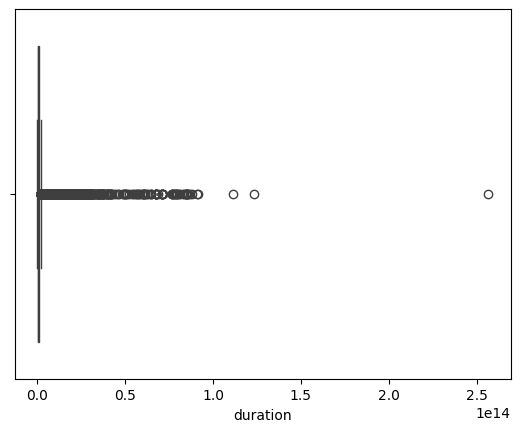

In [20]:
sns.boxplot(x='duration', data=df)     
plt.show()

In [21]:
detect_outliers(df, 'duration').sort_values(by='duration', ascending=False).head(10) # Display outliers in order of duration

,bicycle_id,start_time,end_time,start_location,end_location,duration
130103,86927,2015-05-27 19:31:00,2015-05-30 18:49:00,902,902,2 days 23:18:00
120597,86543,2015-05-17 16:00:00,2015-05-19 02:15:00,102,102,1 days 10:15:00
106911,86271,2015-05-07 22:26:00,2015-05-09 05:26:00,904,904,1 days 07:00:00
104790,86295,2015-05-07 12:16:00,2015-05-08 13:41:00,104,104,1 days 01:25:00
92542,86944,2015-04-27 08:50:00,2015-04-28 10:05:00,516,516,1 days 01:15:00
92704,86840,2015-04-27 10:07:00,2015-04-28 10:36:00,516,516,1 days 00:29:00
92536,87058,2015-04-27 08:48:00,2015-04-28 08:56:00,516,516,1 days 00:08:00
52749,86808,2015-03-22 14:06:00,2015-03-23 13:56:00,1401,809,0 days 23:50:00
52750,86987,2015-03-22 14:07:00,2015-03-23 13:53:00,1401,809,0 days 23:46:00
125285,86047,2015-05-21 10:12:00,2015-05-22 09:52:00,609,511,0 days 23:40:00


**Extremely long trips (multiple days)**  
- These may represent unreturned bikes, misreported end times, or missing check-ins.  
- Long rental durations might suggest that some users are treating the bike-sharing system like a traditional rental service.  

**Policy Implications**  
- If you lock your bike at an off-station location, you will have to pay a service fee.  
- The system is designed to encourage short, efficient trips with quick returns.  

**Insights**  
- Long rental durations could indicate deviations from intended usage patterns or even potential misuse.  

In [22]:
detect_outliers(df, 'duration').sort_values(by='duration', ascending=False).tail() 

,bicycle_id,start_time,end_time,start_location,end_location,duration
123937,86635,2015-05-19 18:33:00,2015-05-19 19:06:00,901,514,0 days 00:33:00
88494,86610,2015-04-23 19:38:00,2015-04-23 20:11:00,1103,1107,0 days 00:33:00
118288,86108,2015-05-15 18:07:00,2015-05-15 18:40:00,515,602,0 days 00:33:00
64399,86548,2015-03-30 18:55:00,2015-03-30 19:28:00,904,1302,0 days 00:33:00
15807,86757,2015-02-03 11:36:00,2015-02-03 12:09:00,809,105,0 days 00:33:00


In [23]:
duration_outliers = detect_outliers(df, 'duration')



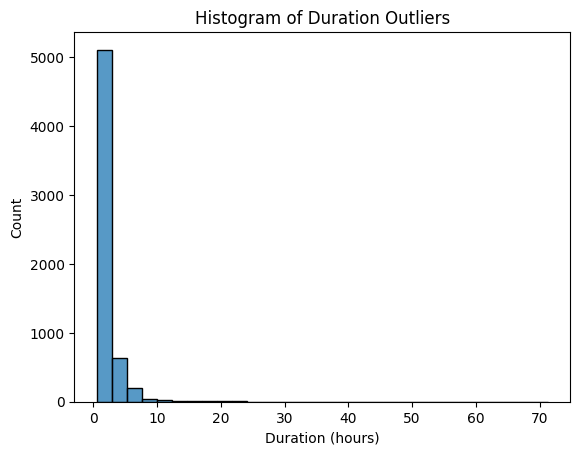

In [24]:
sns.histplot(duration_outliers['duration'].dt.total_seconds() / 3600, bins=30)
plt.xlabel('Duration (hours)')
plt.title('Histogram of Duration Outliers')
plt.show()

**Most outliers are still clustered within the 0–5 hour range, while a long tail extends up to 70+ hours. The IQR cut could be too extreme, so I will choose 99 percentile to cut**

## I might want to classify the trips by duration, as we could identify the different type of users, people that commute to work, people that are visiting etc..

In [25]:
# Calculate the 99th percentile of the duration in hours
percentile_99 = df['duration'].dt.total_seconds().quantile(0.99) / 3600
percentile_99

2.3281666666667054

In [26]:
# Filter the DataFrame to exclude rows with duration above 2.32 hours
df = df[(df['duration'].dt.total_seconds() / 3600) <= percentile_99]

In [27]:
df['duration'].describe()

count                       131800
mean     0 days 00:13:27.220789074
std      0 days 00:12:30.410867183
min                0 days 00:02:00
25%                0 days 00:07:00
50%                0 days 00:11:00
75%                0 days 00:17:00
max                0 days 02:19:00
Name: duration, dtype: object

# Route traffic

In [28]:
df['route'] = df['start_location'].astype(str) + "-" + df['end_location'].astype(str) # Create a new column 'route' by concatenating start and end station IDs
df['route'].head(10) # Display the first 10 rows of the new 'route' column

0      802-508
1      802-508
2     513-1106
3      513-604
5      516-901
6      902-902
7      902-902
8      611-705
9      611-705
10    905-1106
Name: route, dtype: object

In [29]:
df['route'].value_counts().head(10) # Display the top 10 most common routes

route
1304-1304    1129
1301-1304     606
607-604       454
604-607       451
1304-1301     410
1301-1302     354
602-607       342
703-808       288
517-517       283
607-602       276
Name: count, dtype: int64

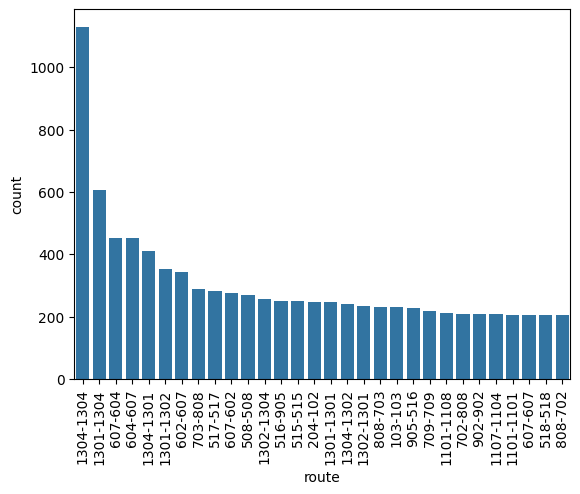

In [30]:
sns.countplot(data=df, x='route', order=df['route'].value_counts().index[:30]) # Plot the top 10 most common routes
plt.xticks(rotation=90) 
plt.show()   

### Route Analysis

- **Route 1304–1304** stands out with the highest number of trips—well over 1,000—significantly exceeding any other route. This suggests that station **1304** is either very popular or that many users start and end their trips at the same station (e.g., a round trip).

- Overall, station **1304** (in various combinations) dominates the usage, hinting at a high-traffic location—possibly near a major hub, university, or other point of interest.

- **Station 1304** corresponds to a location on Margaret Island, a 2.5 km long island in the middle of the Danube in Budapest, Hungary. It is a popular recreational area featuring parks, sports facilities, historical monuments, and a water tower.

In [31]:
trip = df.copy() # Create a copy of the DataFrame to avoid modifying the original data
trip.to_csv('trip.csv', index=False) # Save the modified DataFrame to a new CSV file